На основе рассмотренного на занятии Colab-ноутбука по распознаванию предметов одежды решите задачу распознавания рукописных цифр. Используйте для этого известный набор французского ученого Яна Ле Куна Mnist, содержащий 60 тыс. картинок арабских цифр размером 28x28. В прилагающемся Colab-ноутбуке всюду замените fashion_mnist на mnist. При построении конфигурации полносвязной нейронной сети поэкспериментируйте с различными функции активации, количеством скрытых слоев и количеством нейронов на них.



In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [35]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


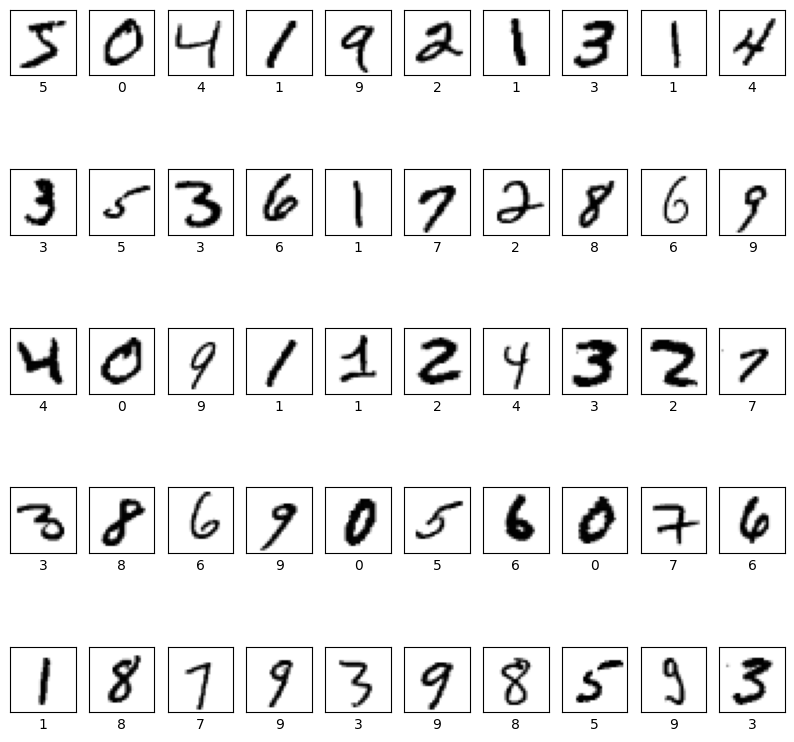

In [5]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
x_train = x_train / 255 
x_test = x_test / 255 

In [8]:
n = 0
print(y_train[n])

5


In [9]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [10]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(400, input_dim=784, activation="relu")) # Входной полносвязный слой, 400 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=400, activation="relu")) # 1 скрытый слой
model.add(Dense(400, input_dim=400, activation="relu")) # 2 скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов (по количеству классов)

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 638,810
Trainable params: 638,810
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=2)

Epoch 1/100
240/240 - 2s - loss: 1.7099 - accuracy: 0.6140 - val_loss: 0.9681 - val_accuracy: 0.8222 - 2s/epoch - 9ms/step
Epoch 2/100
240/240 - 2s - loss: 0.6947 - accuracy: 0.8399 - val_loss: 0.4943 - val_accuracy: 0.8779 - 2s/epoch - 7ms/step
Epoch 3/100
240/240 - 2s - loss: 0.4605 - accuracy: 0.8782 - val_loss: 0.3828 - val_accuracy: 0.8967 - 2s/epoch - 7ms/step
Epoch 4/100
240/240 - 2s - loss: 0.3844 - accuracy: 0.8945 - val_loss: 0.3381 - val_accuracy: 0.9038 - 2s/epoch - 7ms/step
Epoch 5/100
240/240 - 2s - loss: 0.3445 - accuracy: 0.9028 - val_loss: 0.3087 - val_accuracy: 0.9120 - 2s/epoch - 7ms/step
Epoch 6/100
240/240 - 2s - loss: 0.3191 - accuracy: 0.9092 - val_loss: 0.2902 - val_accuracy: 0.9183 - 2s/epoch - 7ms/step
Epoch 7/100
240/240 - 2s - loss: 0.2993 - accuracy: 0.9142 - val_loss: 0.2758 - val_accuracy: 0.9198 - 2s/epoch - 7ms/step
Epoch 8/100
240/240 - 2s - loss: 0.2834 - accuracy: 0.9178 - val_loss: 0.2602 - val_accuracy: 0.9253 - 2s/epoch - 7ms/step
Epoch 9/100
240/

In [14]:
model.save('NN.h5')

Получите оценки качества классификаторов на тестовом множестве. 



In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9758
Доля верных ответов на тестовых данных, в процентах: 97.58


Приведите графики долей правильных ответов на обучающем множестве и валидационном. 

Определите оптимальное количество эпох для обучения для каждой из используемых конфигураций нейронной сети. 



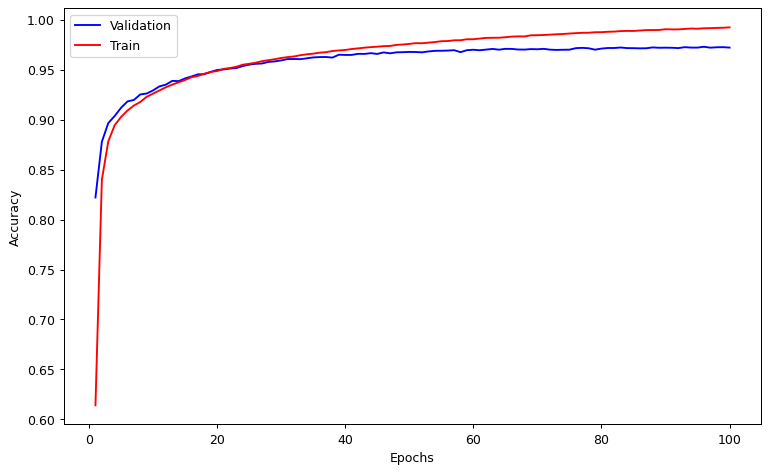

In [16]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Какая конфигурация из используемых лучше? 

Для тестирования результатов на реальных данных можете использовать приложенный архив с изображениями рукописных цифр, а также подготовьте свои картинки (например, в Paint), при этом изображение сделайте близким к квадратному и размер задайте небольшой, в то же время толщина кисти, которой Вы будете писать цифры, должна быть существенной. 



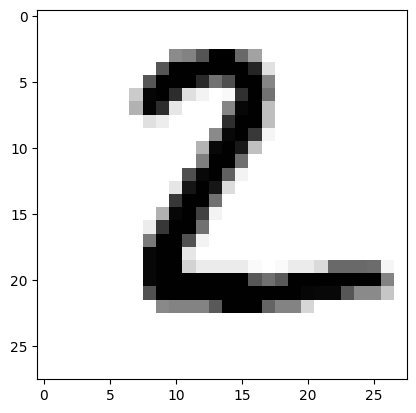

In [17]:
n_test = 1
plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [18]:
x = x_test[n_test]
x = np.expand_dims(x, axis=0)

In [19]:
prediction = model.predict(x)
prediction

1/1 [==============================] - 0s 87ms/step


array([[3.69065361e-07, 1.20859295e-04, 9.99864578e-01, 1.03950561e-05,
        2.63914567e-11, 4.67019090e-09, 3.81718792e-07, 4.90772034e-10,
        3.44044975e-06, 1.64339503e-13]], dtype=float32)

In [20]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 2
Название класса: 2


In [21]:
label = np.argmax(y_test[n_test])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 2
Название класса: 2


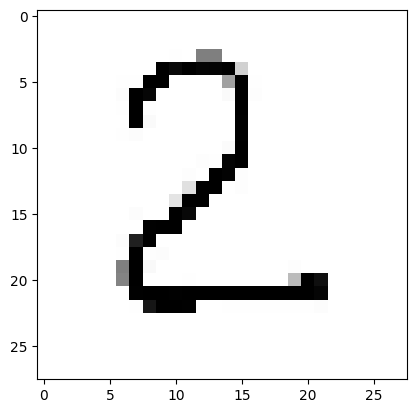

In [76]:
img_path = 'img\\2.jpg'
img = utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()

In [33]:
def preobr(img):
    x = utils.img_to_array(img)
    x = x.reshape(1, 784)
    x = 255 - x
    x /= 255
    return x


In [78]:
prediction = model.predict(preobr(img))
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[1.91817133e-04 8.45040474e-03 9.64080393e-01 7.89305102e-03
  1.25359675e-05 3.67429544e-04 7.85957207e-04 2.49405930e-05
  1.81931555e-02 2.73515752e-07]]


In [80]:
pred = np.argmax(prediction)
print("Номер класса:", pred)
print("Название класса:", classes[pred])

Номер класса: 2
Название класса: 2


In [83]:
path = ["img\\0.jpg",
        "img\\1.jpg",
        "img\\2.jpg",
        "img\\3.jpg",
        "img\\4.jpg",
        "img\\5.jpg",
        "img\\6.jpg",
        "img\\7.jpg",
        "img\\8.jpg",
        "img\\9.jpg",]
for img_path in path: 
    img = utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    prediction = model.predict(preobr(img))
    #print(prediction)
    pred = np.argmax(prediction)
    print(f"{img_path = }")
    print("Название класса:", classes[pred])

1/1 [==============================] - 0s 20ms/step
img_path = 'img\\0.jpg'
Название класса: 0
1/1 [==============================] - 0s 31ms/step
img_path = 'img\\1.jpg'
Название класса: 6
1/1 [==============================] - 0s 21ms/step
img_path = 'img\\2.jpg'
Название класса: 2
1/1 [==============================] - 0s 20ms/step
img_path = 'img\\3.jpg'
Название класса: 3
1/1 [==============================] - 0s 21ms/step
img_path = 'img\\4.jpg'
Название класса: 4
1/1 [==============================] - 0s 20ms/step
img_path = 'img\\5.jpg'
Название класса: 5
1/1 [==============================] - 0s 20ms/step
img_path = 'img\\6.jpg'
Название класса: 7
1/1 [==============================] - 0s 20ms/step
img_path = 'img\\7.jpg'
Название класса: 2
1/1 [==============================] - 0s 20ms/step
img_path = 'img\\8.jpg'
Название класса: 5
1/1 [==============================] - 0s 21ms/step
img_path = 'img\\9.jpg'
Название класса: 3
-----------
1/1 [==============================] -

Постарайтесь понять, с какими цифрами построенный классификатор испытывает наибольшие сложности. 


ошибочные числа: 1, 6, 7, 8, 9

6 8 и 9 довольно сложные числа и часто путаются между собой и с 3

не понятно почему у сети проблемы с 1 и 7, между собой они ещё как-то и похожи, но сеть определяет 1 как 6, что совсем непонятно


Решите задачу классификации методами, рассмотренными в прошлом семестре. 

Сравните с работой классификатора на основе нейронной сети по времени, по точности.

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = list(map(np.ndarray.flatten,np.array(x_train)))
x_test = list(map(np.ndarray.flatten,np.array(x_test)))

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [17]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [18]:
y_pred = svc.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9792


In [26]:
import random

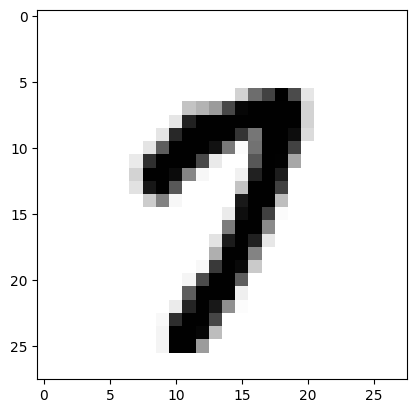

результат обучения: 7
правильный ответ: 7


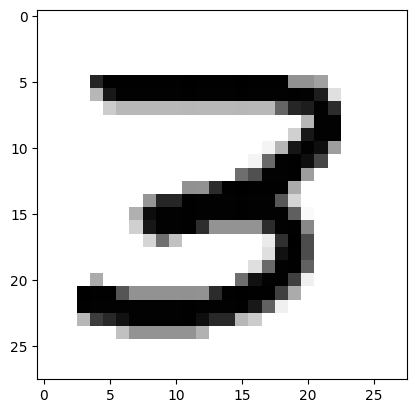

результат обучения: 3
правильный ответ: 3


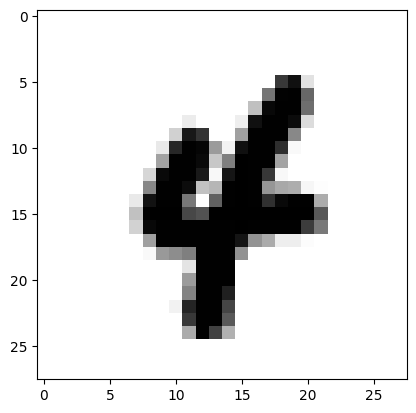

результат обучения: 4
правильный ответ: 4


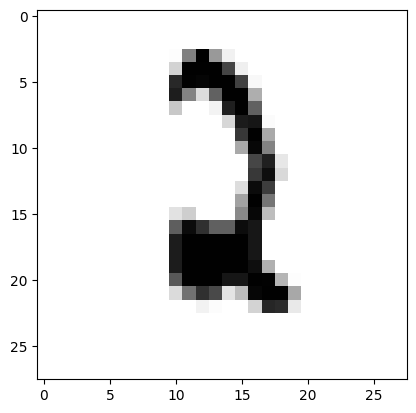

результат обучения: 2
правильный ответ: 2


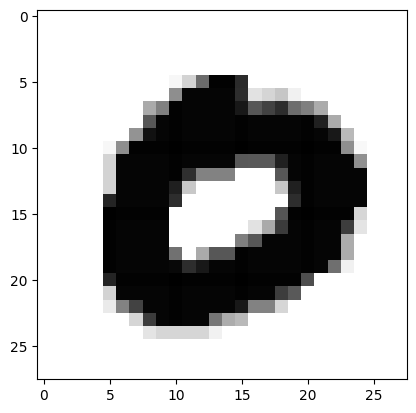

результат обучения: 0
правильный ответ: 0


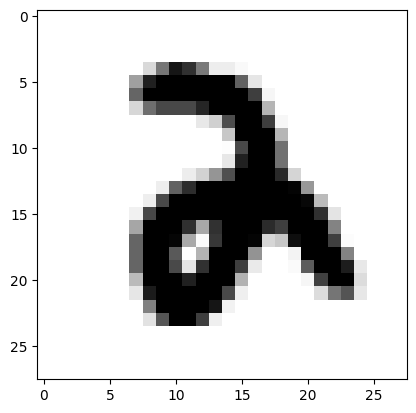

результат обучения: 2
правильный ответ: 2


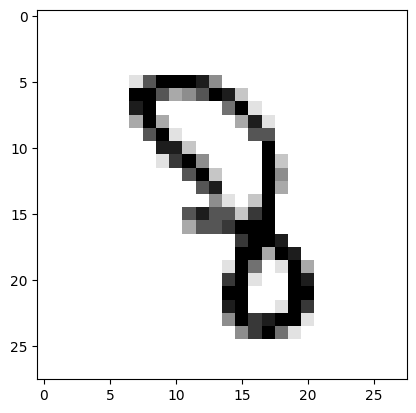

результат обучения: 3
правильный ответ: 8


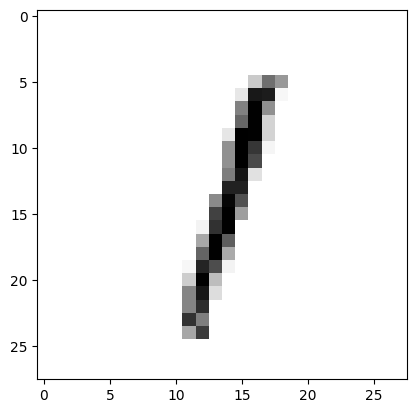

результат обучения: 1
правильный ответ: 1


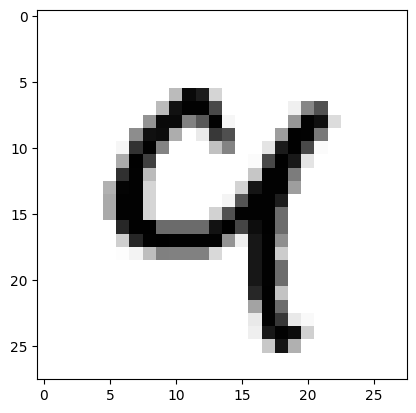

результат обучения: 9
правильный ответ: 9


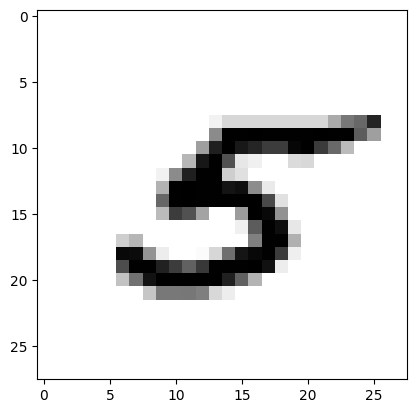

результат обучения: 5
правильный ответ: 5


In [31]:
for i in range(10):
    i = random.randint(0,len(x_test))
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.show()
    print(f"результат обучения: {y_pred[i]}")
    print(f"правильный ответ: {y_test[i]}")

In [46]:
print(accuracy_score(y_test, y_pred))

0.9792
